<a href="https://colab.research.google.com/github/AmrithaRockss/ORE-Final_Task/blob/main/Project_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import integrate
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns

from ipywidgets import interactive, fixed

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/data.csv')

Mounted at /content/drive


In [5]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

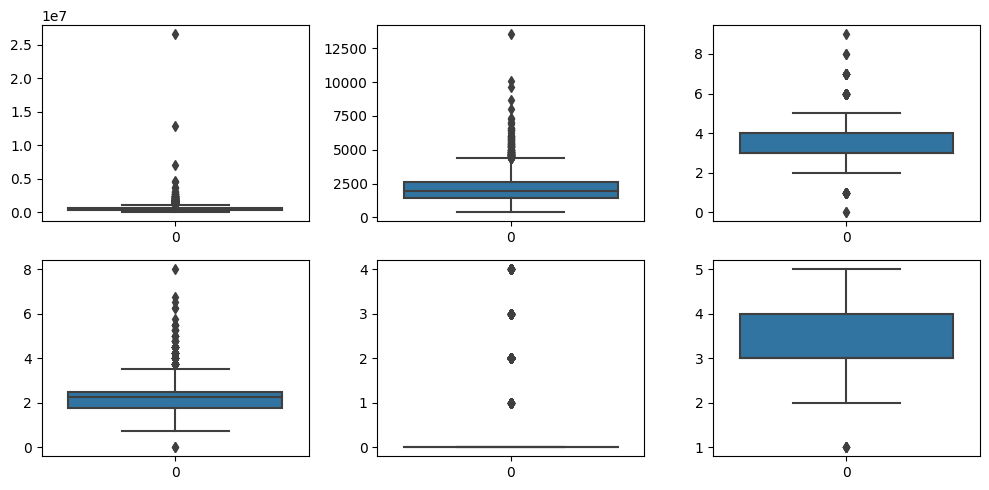

In [14]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['sqft_living'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['view'], ax = axs[1,1])
    plt3 = sns.boxplot(data['condition'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

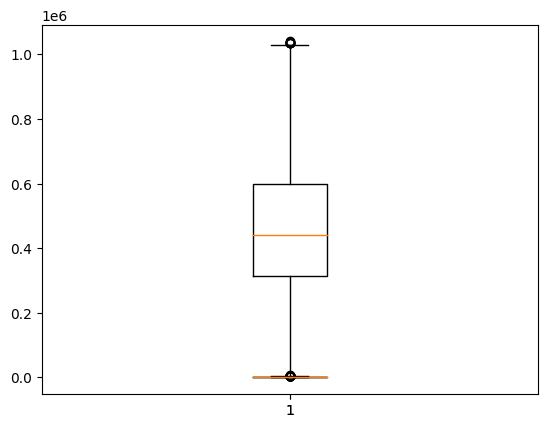

In [18]:
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

plot.boxplot(data.sqft_living)
Q1 = data.sqft_living.quantile(0.25)
Q3 = data.sqft_living.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.sqft_living >= Q1 - 1.5*IQR) & (data.sqft_living <= Q3 + 1.5*IQR)]

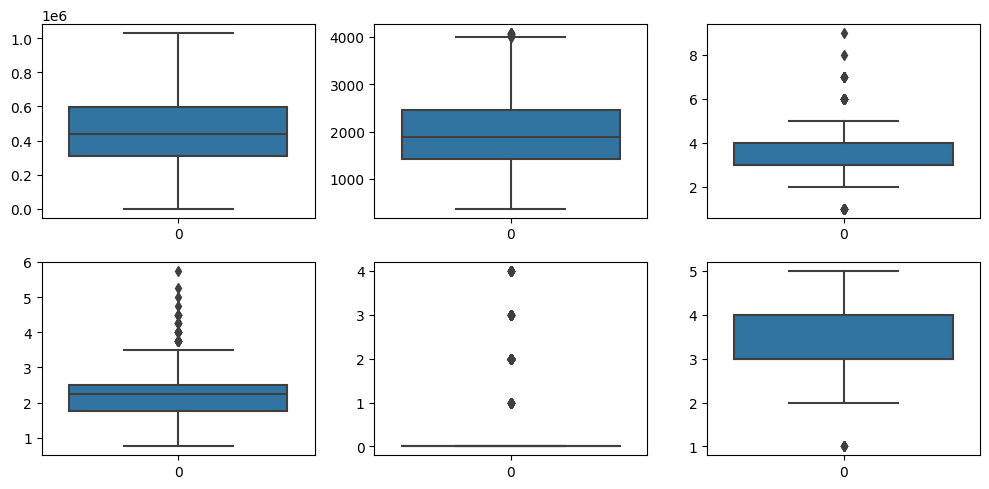

In [19]:
detectOutliers()

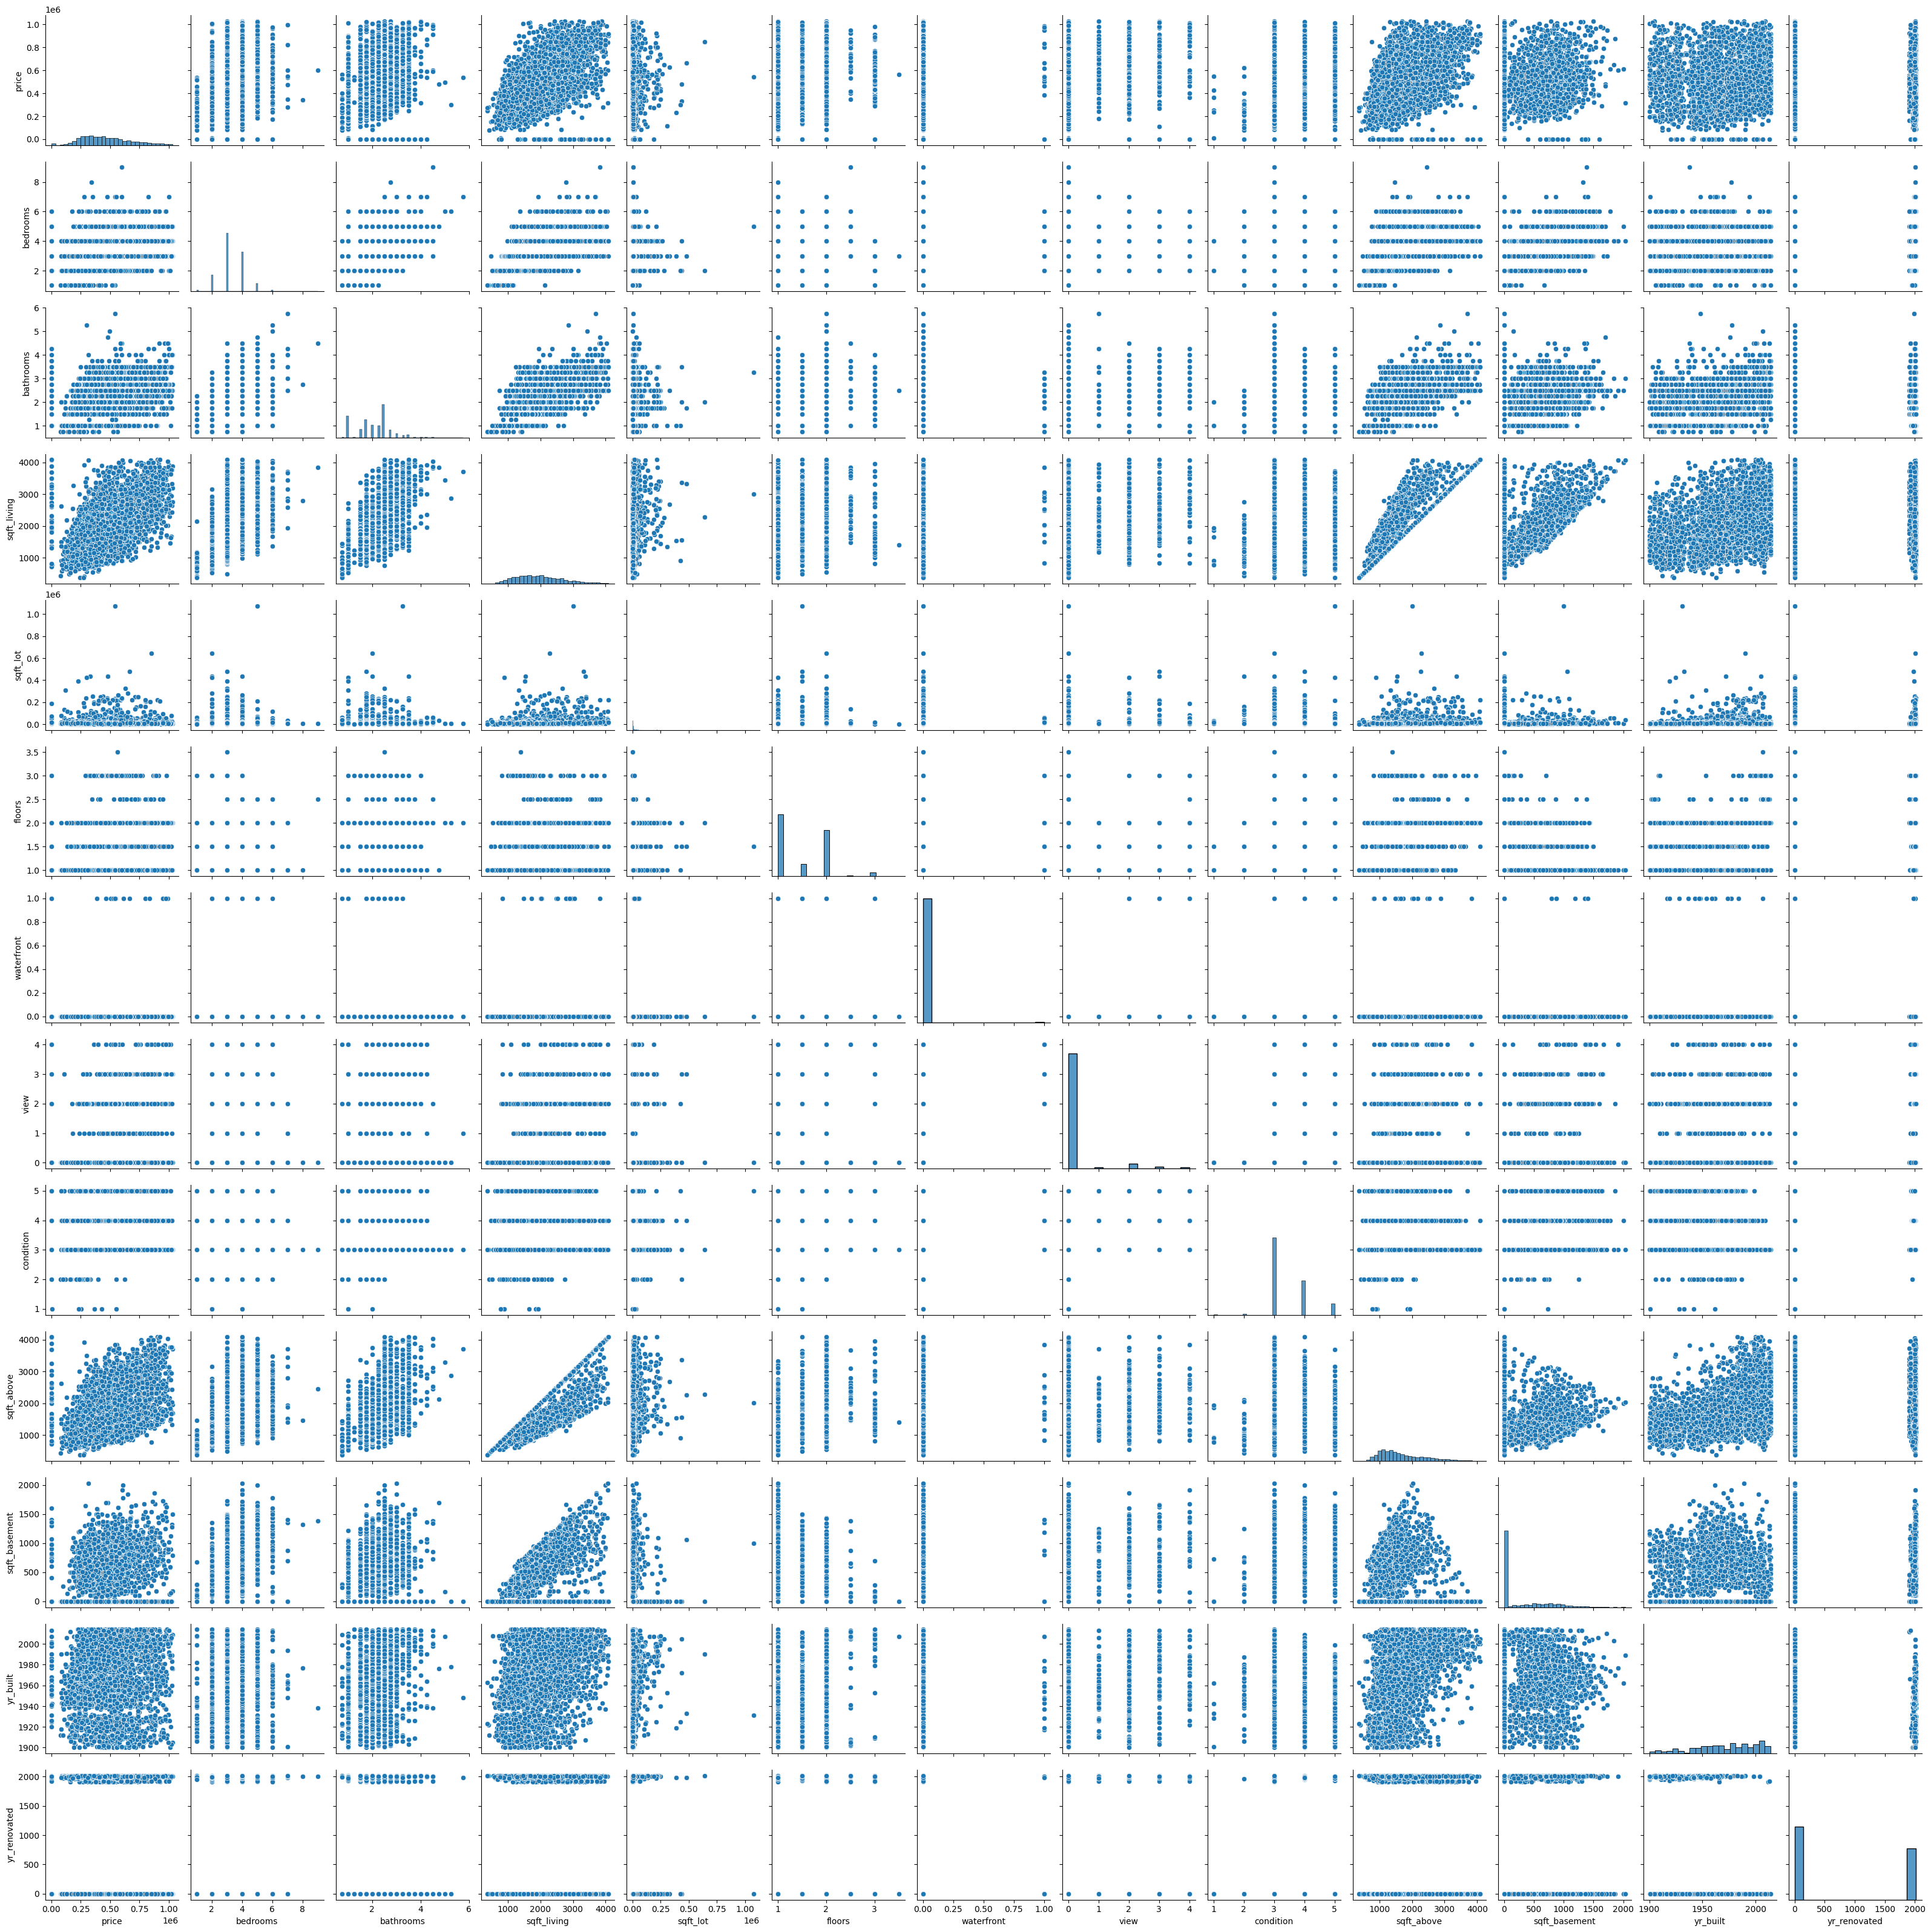

In [20]:
sns.pairplot(data)
plot.show()

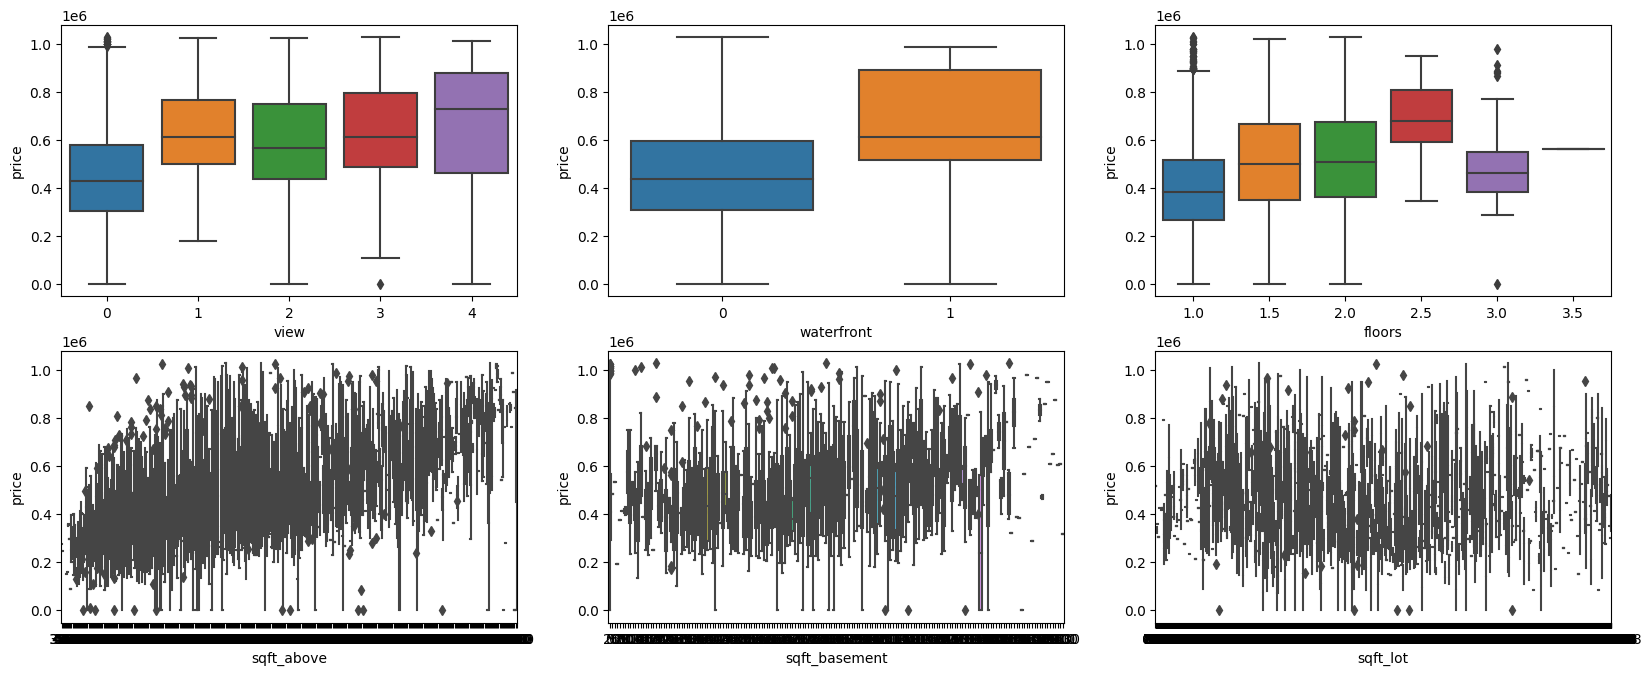

In [25]:
plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='view', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='waterfront', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='floors', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='sqft_above', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='sqft_basement', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='sqft_lot', y='price', data=data)
plot.show()

In [47]:
def toNumeric(x):
    return x.map({"no":0,"yes":1})
def convert_binary():
    for column in list(data.select_dtypes(['object']).columns):
        if(column != 'city'):
            data[[column]] = data[[column]].apply(toNumeric)
convert_binary()

In [48]:
status = pd.get_dummies(data['city'])
status

""
0
2
3
4
5
...
4595
4596
4597
4598


In [49]:
status = pd.get_dummies(data['city'], drop_first=True)

In [50]:
data = pd.concat([data, status], axis=1)

In [51]:
data.drop(columns='city',inplace=True)

In [52]:
Y = data.price

X = data.iloc[:,1:]

In [54]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create the regression model
regression = LinearRegression()

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Convert column names to strings for x_train
x_train.columns = x_train.columns.astype(str)

# Convert row labels (index) to strings for y_train
y_train.index = y_train.index.astype(str)

# Fit the regression model using the imputed data
regression.fit(x_train_imputed, y_train)


LinearRegression()

In [69]:
from sklearn.impute import SimpleImputer

# Impute missing values in x_test using the same imputer as before
x_test_imputed = imputer.transform(x_test)

# Make predictions
y_predict = regression.predict(x_test_imputed)


Text(0, 0.5, 'y_pred')

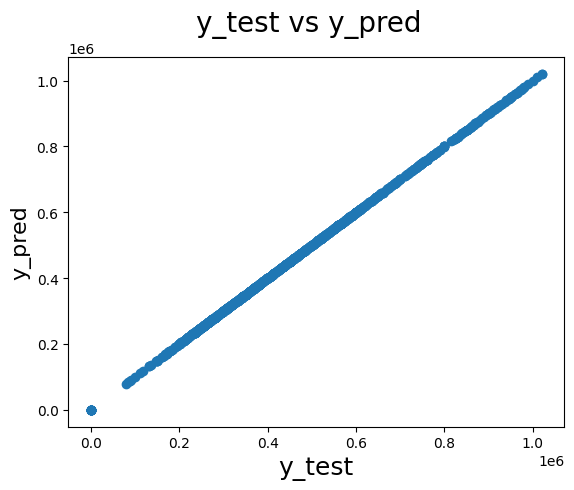

In [71]:
plot.scatter(y_test,y_predict)
plot.suptitle('y_test vs y_pred', fontsize=20)
plot.xlabel('y_test', fontsize=18)
plot.ylabel('y_pred', fontsize=16)

In [73]:
from sklearn.impute import SimpleImputer

# Impute missing values in x_train using the same imputer
x_train_imputed = imputer.transform(x_train)

# Fit the regression model using statsmodels with the imputed data
import statsmodels.api as sms
model_1 = sms.OLS(y_train, x_train_imputed).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.329e+32
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                        0.00
Time:                        22:45:07   Log-Likelihood:                          64473.
No. Observations:                3161   AIC:                                 -1.289e+05
Df Residuals:                    3151   BIC:                                 -1.289e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   3.66e-17   2.73e+16      0.000       1.000       1.000
x2          5.414e-12    1.3e-11      0.416      0.678   -2.01e-11    3.09e-11
x3          1.407e-14   9.17e-15      1.534      0.125   -3.91e-15     3.2e-14
x4          3.847e-16   1.99e-16      1.929      0.054   -6.42e-18    7.76e-16
x5           1.86e-11   1.01e-11      1.845      0.065   -1.16e-12    3.84e-11
x6         -2.199e-11   9.46e-12     -2.325      0.020   -4.05e-11   -3.45e-12
x7          4.533e-15   8.23e-15      0.551      0.582   -1.16e-14    2.07e-14
x8          2.474e-14   1.08e-14      2.283      0.022    3.49e-15     4.6e-14
x9          1.533e-14   2.24e-14      0.685      0.493   -2.86e-14    5.92e-14
x10         5.843e-15   6.52e-15      0.896      0.370   -6.94e-15    1.86e-14
x11         2.973e-11   3.44e-11      0.865      0.387   -3.76e-11    9.71e-11
x12        -3.451e-11   3.44e-11     -1.004      0.315   -1.02e-10    3.29e-11
x13         -4.72e-12   3.44e-11     -0.137      0.891   -7.21e-11    6.27e-11
==============================================================================
Omnibus:                      120.366   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.557
Skew:                          -0.500   Prob(JB):                     9.97e-30
Kurtosis:                       3.112   Cond. No.                     6.78e+23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.8e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""